## KING COUNTY HOUSE PRICE PREDICTION

## Final Project Submission

**Please fill out:## PHASE II PROJECT FOR GROUP 5(Analysis of King County Housing Market)**
* Student name: Prudence Coredo, Titus Mutuku, Gloria Nyongesa, Candy  Gudda, Eric Lintari, Sadi Kiri
* Student pace: Full time
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:

# Overview
This project investigates the factors affecting prices of houses in King County, Washington.




# Business Understanding
To identify how house prices are affected by various factors and to provide a guide on how to best identify properties that bear a high resell value for to maximize on profit margins.

# Background
King County has witnessed a vibrant real estate market.The housing market in this county is competitive, and homeowners looking to buy or sell properties frequently seek guidance from local real estate agencies. One common concern among homeowners is the potential value added by home renovations. This project aims to provide data-driven insights into this issue, helping homeowners make informed decisions on their properties. The King County House Sales dataset serves as a valuable resource for this analysis.

## Data Exploration/Understanding
- This dataset contains house sales prices for King County. It includes homes sold between May 2014 and May 2015.
- The dependent Variable: Sales Price / Selling Price
- The predictors: the sale date, renovation year, number of bedrooms and bathrooms, number of floors, the square footage of the   houses (both living and lot), and available view of waterfront. Also, the dataset contains the grade and condition of each       house.
- Datatypes: All are integers or Float except the  date and sqft_basement (object).
- Distribution of our data:
   - continuous: sqft_living, sqft_lot, sqft_above, sqft_basement (after adjustment), gap year between sold and built/renovated
   - discrete: bedrooms, bathrooms, grade, floors, condition
   - categorical: waterfront
- Our datasets contain 21,597 items of house sale information
- We will eliminate the information such as house ID, zipcode, latitude and longitude, and whether the house has been viewed or    not.

### Importing Libraries

#### Importing the relevant modules and the dataset

In [6]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
plt.style.use('seaborn')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

#### Loading the dataset using pandas

In [7]:
# Loading the data
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


The dataset contains 21597 rows and 21 columns. Each row of the dataset contains information about one house.

Our objective is to find a way to estimate the value in the "price" column using the values in the other columns. By achieving this using this set of data, then we should able to estimate prices of other houses too, simply by asking for information like bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement' etc

### Data Understanding

In [8]:
#Obtaining the statistical summary of the data set
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


In [9]:
# Get more infomation on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
#Checking for missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Data Cleaning / Preparation

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis

In [11]:
df_cleaned = df.drop(['id','date','view','sqft_living15','sqft_lot15','sqft_basement',"sqft_above",'yr_renovated'], axis = 1)
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009,98103,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014,98146,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009,98144,47.5944,-122.299
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004,98027,47.5345,-122.069


The dropped columns are not necessary in our analysis.

In [12]:
#Checking information of te dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
 11  lat          21597 non-null  float64
 12  long         21597 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 2.1+ MB


In [13]:
#Xhecking for null values in cleaned dataset
df_cleaned.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
lat               0
long              0
dtype: int64

In [14]:
# Removing null values for the dataset
df_cleaned = df_cleaned.dropna()
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074,47.6168,-122.045
5,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001,98053,47.6561,-122.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,2008,98116,47.5773,-122.409
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009,98103,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014,98146,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009,98144,47.5944,-122.299


In [15]:
#Checking for duplicates
df_cleaned.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
21591    False
21592    False
21593    False
21594    False
21596    False
Length: 19221, dtype: bool

In [16]:
for val in df_cleaned:
   print(df_cleaned[val].value_counts())
   print()

450000.0    153
350000.0    147
550000.0    144
500000.0    142
425000.0    135
           ... 
225800.0      1
444500.0      1
608250.0      1
418800.0      1
884744.0      1
Name: price, Length: 3391, dtype: int64

3     8721
4     6149
2     2451
5     1441
6      227
1      175
7       35
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50    4839
1.00    3411
1.75    2725
2.25    1788
2.00    1722
1.50    1283
2.75    1038
3.00     662
3.50     656
3.25     521
3.75     136
4.00     121
4.50      91
4.25      73
0.75      65
4.75      22
5.00      17
5.25      11
5.50      10
1.25       8
6.00       6
0.50       4
5.75       3
8.00       2
6.25       2
6.75       2
7.75       1
6.50       1
7.50       1
Name: bathrooms, dtype: int64

1300    125
1440    121
1400    120
1820    118
1660    113
       ... 
2905      1
2793      1
4810      1
2665      1
2007      1
Name: sqft_living, Length: 992, dtype: int64

5000     329
6000     253
4000     

In [17]:
# Spliting the grade column to a new column which only has the grade value in numbers.

df_cleaned.loc[:, 'grade'] = df_cleaned['grade'].str.split(' ').str[0]


In [18]:
#Changing the data type of grade from str to int
df_cleaned.loc[:, 'grade'] = df_cleaned['grade'].astype(np.int64)

In [19]:
# Changing  catergorical data in the condition column to numeric

# df_cleaned['condition'] = df_cleaned['condition'].map({'Poor':1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5})
df_cleaned.loc[:,'condition'] = df_cleaned['condition'].map({'Poor':1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5})
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
1,538000.0,3,2.25,2570,7242,2.0,NO,3,7,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,NO,3,6,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,NO,5,7,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,NO,3,8,1987,98074,47.6168,-122.045
5,1230000.0,4,4.50,5420,101930,1.0,NO,3,11,2001,98053,47.6561,-122.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,NO,3,8,2008,98116,47.5773,-122.409
21592,360000.0,3,2.50,1530,1131,3.0,NO,3,8,2009,98103,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,NO,3,8,2014,98146,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,NO,3,7,2009,98144,47.5944,-122.299


In [20]:
# From this we can tell the condition of most houses is average.
df_cleaned['condition'].value_counts()

3    12474
4     5058
5     1512
2      152
1       25
Name: condition, dtype: int64

In [21]:
df_cleaned['waterfront'] = df['waterfront'].replace({'YES': 1, 'NO':0})
df_cleaned.loc[:, 'waterfront'] = df_cleaned['waterfront'].astype(np.int64)

This will now make it easier when carrying out statistical measurements.

In [22]:
#Checking data information
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19221 non-null  float64
 1   bedrooms     19221 non-null  int64  
 2   bathrooms    19221 non-null  float64
 3   sqft_living  19221 non-null  int64  
 4   sqft_lot     19221 non-null  int64  
 5   floors       19221 non-null  float64
 6   waterfront   19221 non-null  int64  
 7   condition    19221 non-null  int64  
 8   grade        19221 non-null  int64  
 9   yr_built     19221 non-null  int64  
 10  zipcode      19221 non-null  int64  
 11  lat          19221 non-null  float64
 12  long         19221 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 2.1 MB


#### Data distribution

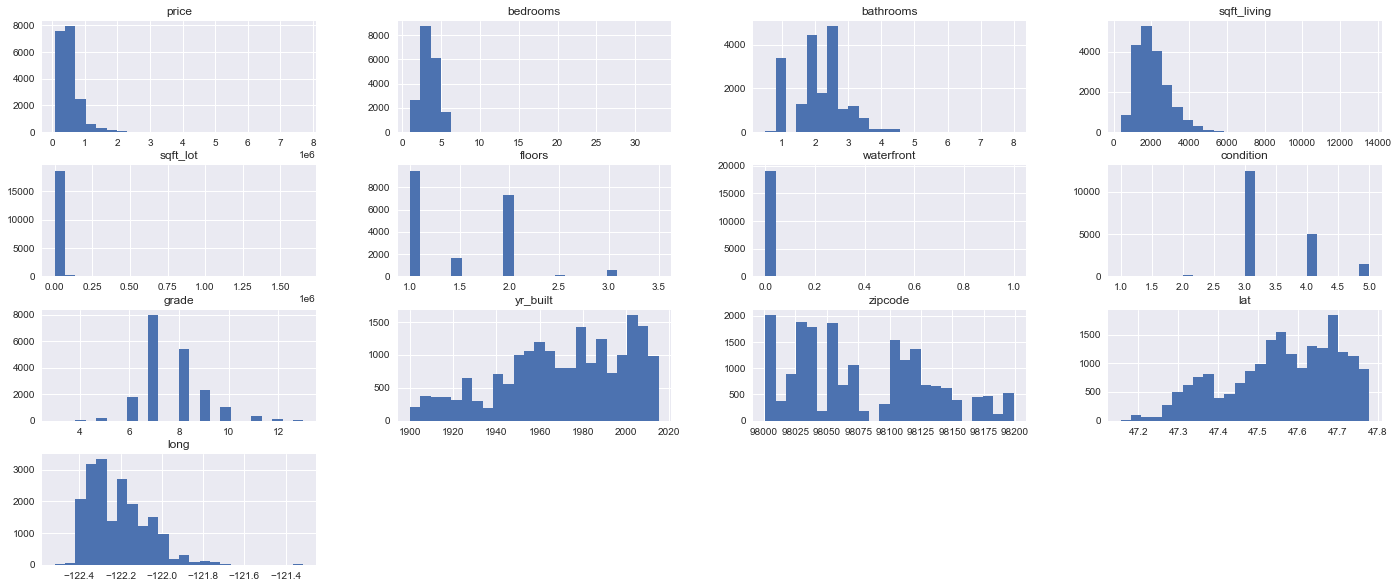

In [23]:
# plotting histograms to visualize patterns in the data
df_cleaned.hist(figsize = (24,10), bins= 24)
plt.show()

##### Correlation Matrix
Using a heatmap to find out the correlation between the variables of this data set

In [24]:
# Finding out the correlation between the features
df_cleaned.corr()['price']

price          1.000000
bedrooms       0.309651
bathrooms      0.527350
sqft_living    0.704652
sqft_lot       0.087005
floors         0.258277
waterfront     0.276295
condition      0.038037
grade          0.667224
yr_built       0.053525
zipcode       -0.050212
lat            0.305126
long           0.021390
Name: price, dtype: float64

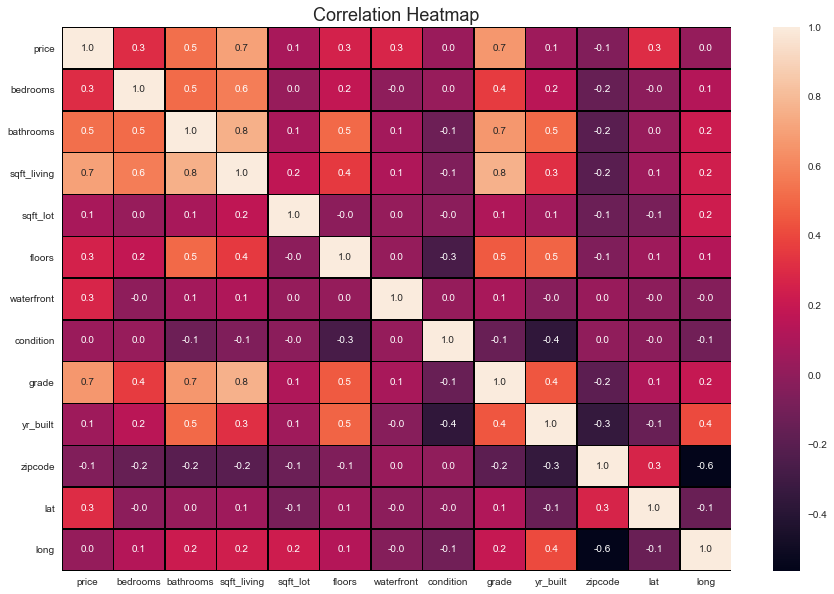

In [25]:
# Plotting a correlation heatmap using seaborn. Border the squares with black color, show the correlation index and round it up.
plt.figure(figsize=(15, 10))  # Set the figure size
sns.heatmap(df_cleaned.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='1.1f')

# Give a title to the map and display it.
plt.title('Correlation Heatmap', size=18)
plt.show()

**The Relationship between our TARGET and the PREDICTORS**

In [26]:
# Invetigate the the relationship between the target(price) and the predictors by data visualization
df_cleaned['price'].describe()

count    1.922100e+04
mean     5.416398e+05
std      3.722478e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.440000e+05
max      7.700000e+06
Name: price, dtype: float64

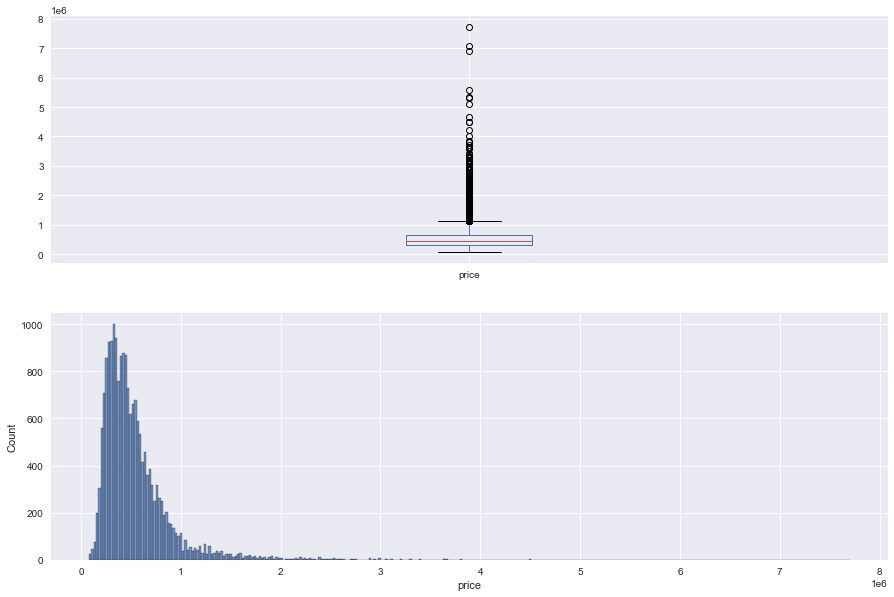

In [27]:
# creating two plots to visualize the distribution of a 'price' column in the cleaned Dataframe
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
ax1 = df_cleaned['price'].plot.box()
ax2 = fig.add_subplot(212)
ax2 = sns.histplot(data=df_cleaned, x='price')

In [28]:
# Calculate the mean, median, and mode and the max_price
# Calculate the mean
mean_price = df_cleaned['price'].mean()

# Calculate the median
median_price = df_cleaned['price'].median()

# Calculate the mode
mode_price = df_cleaned['price'].mode()
# Calculate Maximum price
max_price = df_cleaned['price'].max()

print(f"The maximum price is: {max_price}")
print(f"The mean price is: {mean_price}")
print(f"The median price is: {median_price}")
print(f"The mode price is: {mode_price}")

The maximum price is: 7700000.0
The mean price is: 541639.8338275844
The median price is: 450000.0
The mode price is: 0    450000.0
dtype: float64


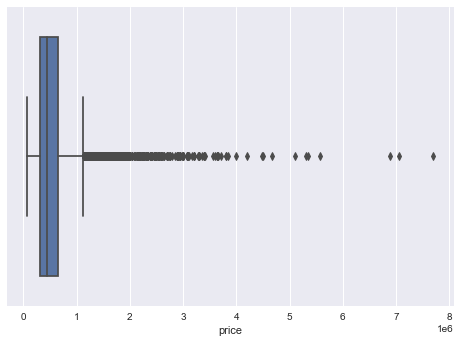

In [29]:
sns.boxplot(df_cleaned['price']);

In [30]:
house_df = df_cleaned[(df_cleaned.price < df_cleaned.price.quantile(0.995)) 
                        & (df_cleaned.price > df_cleaned.price.quantile(.005))]
house_df
#df_filtered 


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,3,6,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987,98074,47.6168,-122.045
5,1230000.0,4,4.50,5420,101930,1.0,0,3,11,2001,98053,47.6561,-122.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,0,3,8,2008,98116,47.5773,-122.409
21592,360000.0,3,2.50,1530,1131,3.0,0,3,8,2009,98103,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,0,3,8,2014,98146,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,0,3,7,2009,98144,47.5944,-122.299


**Comments**
- Observations: The Price data is heavily skewed because it is apparent there are many outliers. The average price of a house in King County is 540k while the median price is 450k which can be associated with affordability and the Middle class members of the society. the highest priced house/home is at $7.7 Millionwhich is significaqntly higher compared to the average price
* Action: Remove the Outliers in the price field/column because most clients of the expected clients are middle class hence the target clients for all investors. In order to reduce the skewness, we will remove the houses with prices over USD 1M (keeping 93% of data).

In [31]:
#Remove the outliers of prices to avoid skewness
df_filtered = df_cleaned[df_cleaned['price'] <= 1000000]
df_filtered.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,3,6,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987,98074,47.6168,-122.045
6,257500.0,3,2.25,1715,6819,2.0,0,3,7,1995,98003,47.3097,-122.327


**Price vs Bedrooms**

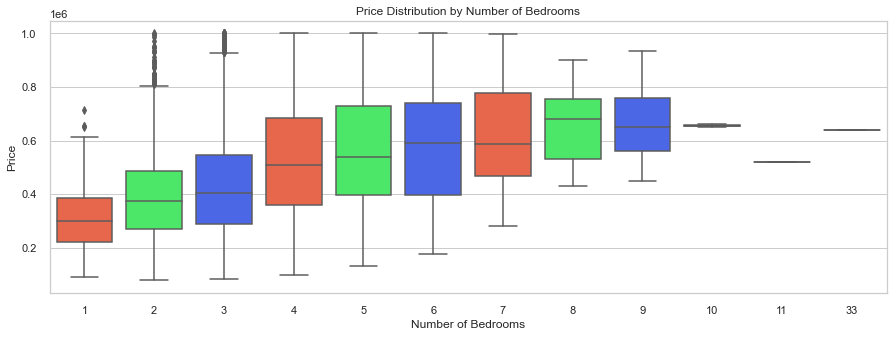

In [32]:
# Defining the custom colors
boxplot_colors = ["#FF5733", "#33FF57", "#3357FF"]
# Seting the style for the boxplot
sns.set(style="whitegrid")
# Create the boxplot with custom colors
plt.figure(figsize=(15, 5))
sns.boxplot(x='bedrooms', y='price', data=df_filtered, palette=boxplot_colors)
# Add a title
plt.title("Price Distribution by Number of Bedrooms")

# Customize the axis labels
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")

plt.show()


In [33]:
#drop the outlier of bedrooms
df_filtered = df_filtered[df_filtered['bedrooms'] <= 7]

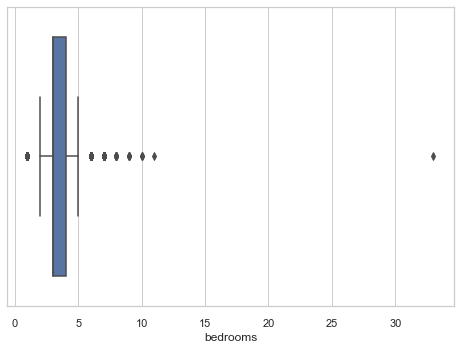

In [34]:
sns.boxplot(house_df['bedrooms']);

In [68]:
house_df.loc[(house_df.bedrooms == 33), 'bedrooms'] = 3

print(house_df['bedrooms'].value_counts())

house_df['bedrooms'].mean()

3     8675
4     6063
2     2347
5     1372
6      206
1      118
7       28
8       10
9        6
10       3
11       1
Name: bedrooms, dtype: int64


3.3754315152158902

**Comments**

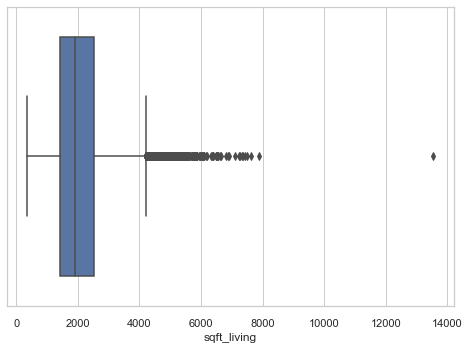

In [36]:
sns.boxplot(house_df['sqft_living']);

In [37]:
house_df = house_df[(house_df.sqft_living < house_df.sqft_living.quantile(0.995)) 
                        & (house_df.sqft_living > house_df.sqft_living.quantile(.005))]
house_df
df_filtered

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,3,6,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987,98074,47.6168,-122.045
6,257500.0,3,2.25,1715,6819,2.0,0,3,7,1995,98003,47.3097,-122.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,0,3,8,2008,98116,47.5773,-122.409
21592,360000.0,3,2.50,1530,1131,3.0,0,3,8,2009,98103,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,0,3,8,2014,98146,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,0,3,7,2009,98144,47.5944,-122.299


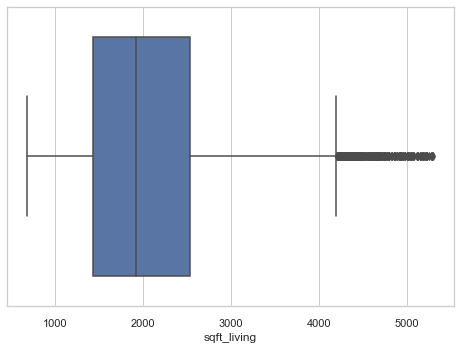

In [69]:
sns.boxplot(house_df['sqft_living']);

- There's linearity between price and bedrooms. The more the bedrooms, the higher the value of houses.
- Most houses have no more than 6 bedrooms. (keeping over 98% of the data)

**Comparing Price vs Grade**

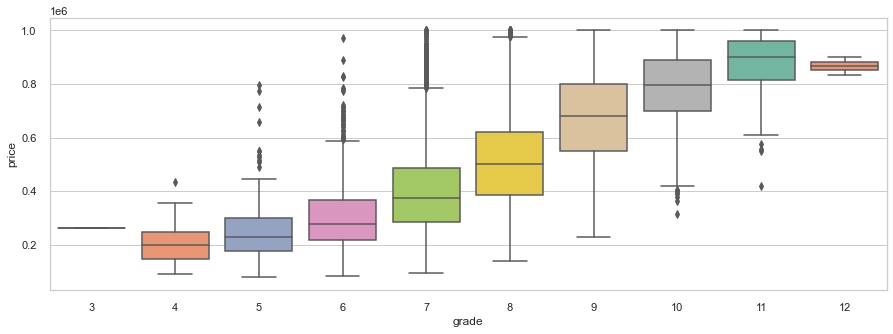

In [38]:
# Creating the boxplot with a different color palette
plt.figure(figsize=(15, 5))
sns.boxplot(x='grade', y='price', data=df_filtered, palette='Set2')

# Showing the plot
plt.show()

**Comment**


* Linearity-There's linearity between price and grade. The higher the grade, the higher the price.


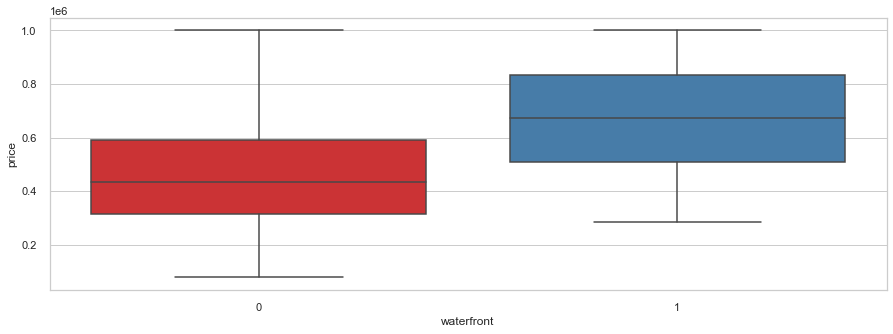

In [39]:
# Creating the boxplot with a different color palette
plt.figure(figsize=(15, 5))
sns.boxplot(x='waterfront', y='price', data=df_filtered, palette='Set1')

# Showing the plot
plt.show()

**Price vs Yr_built**

In [40]:
df_filtered['yr_built'].max()

2015

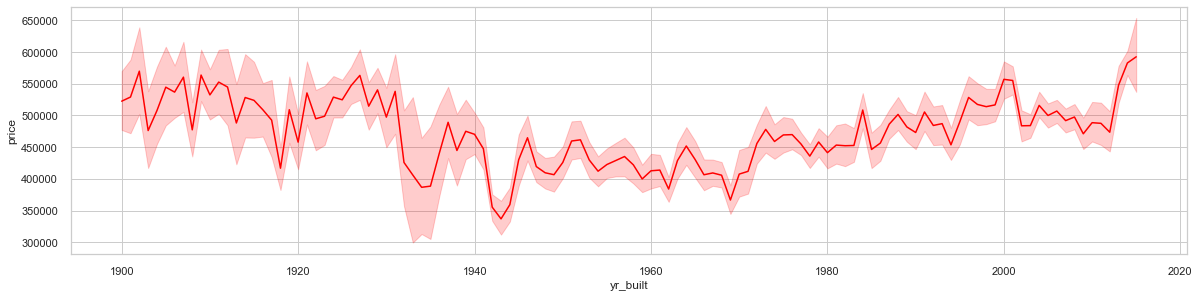

In [41]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(211)
sns.lineplot(x='yr_built', y='price', data=df_filtered, color='red', ax=ax1)

ax1.set_prop_cycle(color=['blue'])

**Comments**

- There's no linearity between price and the year_built
- Once the house is over 70 years old, the value increases
- For houses built in 2014 and 2015, the prices are significantly high

## Modeling

**Multiple Linear Regression**

- The Model is created based on three selected predictors



In [42]:
x_cols = ["waterfront", "sqft_living", "grade",'bedrooms']
x_cols

['waterfront', 'sqft_living', 'grade', 'bedrooms']

**Split Data into Training and Test Sets**

In [43]:
X = house_df[x_cols]
y = house_df['price']

In [44]:
# Split the data into training and test sets. Use the default split size
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, shuffle = True)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

14121 4708 14121 4708


In [45]:
# y-intercept
X_train_bm = sm.add_constant(X_train)
X_test_bm = sm.add_constant(X_test)

In [46]:
# Fitting the actual model
model_m2 = sm.OLS(y_train, X_train_bm)
results_m2 = model_m2.fit()
print(results_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     4090.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:16:56   Log-Likelihood:            -1.9270e+05
No. Observations:               14121   AIC:                         3.854e+05
Df Residuals:                   14116   BIC:                         3.854e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -4.75e+05   1.58e+04    -30.129      

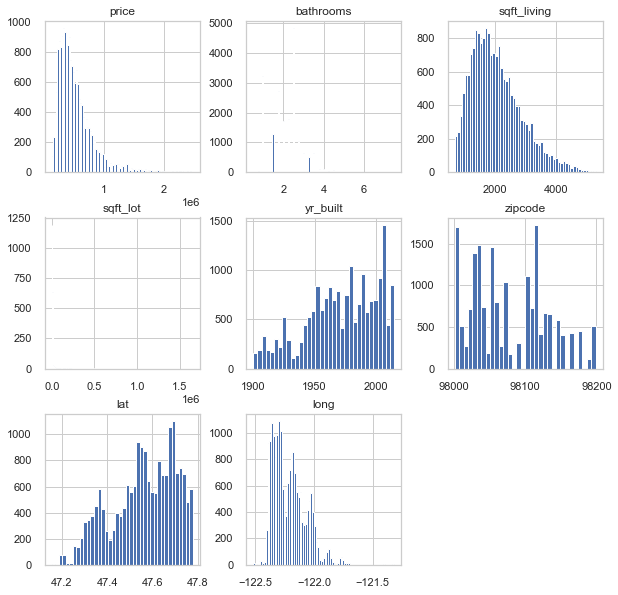

In [47]:
#log transformation.
#examine distributions of continuous variables
cont_data = house_df.loc[:, ((house_df.dtypes != 'object') & (df.nunique() > 20))]
cont_data.hist(bins='auto', figsize=(10,10));

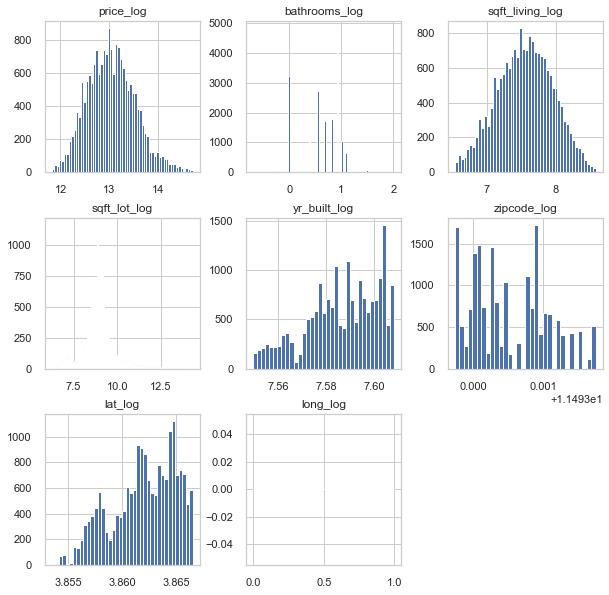

In [48]:
#log transforms of continuous variables
log_names = [f'{column}_log' for column in cont_data.columns]

log_data = np.log(cont_data);
log_data.columns = log_names;
log_data.hist(figsize=(10, 10), bins='auto');


In [49]:
cont_data.drop(['bathrooms', 'yr_built'], axis=1, inplace=True)
log_data.drop(['bathrooms_log', 'yr_built_log'], axis=1, inplace=True)


In [50]:
df_final = pd.concat([df.drop(cont_data.columns, axis=1), log_data],  axis=1)

In [51]:
#assigning independent(X) and dependent(y) variables
X = df_final.drop('price_log', axis=1)
y = df_final.price_log

In [52]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

baseline model

In [53]:
corr = house_df.corr()['price'].sort_values(ascending=False)
corr

price          1.000000
grade          0.667837
sqft_living    0.666011
bathrooms      0.488025
lat            0.353992
bedrooms       0.301765
floors         0.265339
waterfront     0.173690
sqft_lot       0.078050
condition      0.041989
yr_built       0.038919
long           0.019929
zipcode       -0.033494
Name: price, dtype: float64

using highest correlating feature to price. Grade is used for our base model

In [54]:
y = house_df['price']

X_baseline = house_df[['grade']]

In [55]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.516e+04
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:17:11   Log-Likelihood:            -2.5863e+05
No. Observations:               18829   AIC:                         5.173e+05
Df Residuals:                   18827   BIC:                         5.173e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.509e+05   1.13e+04    -75.287      0.0

R-squared: This represents the proportion of the variance in the target variable (price) that can be explained by the independent variable (grade). Here, R-squared is 0.420, which means that approximately 42.0% of the variance in housing prices can be explained by the grade of the house.

In [56]:
baseline_results.f_pvalue

0.0

The p-value of the f-statistic is extremely small (p < 0.001), indicating that the regression model is significant overall and that the independent variable (grade) is a good predictor of the dependent variable (price).

baseline_results.pvalues

In [57]:
baseline_results.pvalues

const    0.0
grade    0.0
dtype: float64

multiple linear regression

In [58]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'zipcode', 'lat',
       'long'],
      dtype='object')

In [65]:
x_iterated = house_df.drop(columns='price')
x_iterated.columns
#columns_to_drop = ['price', 'zipcode', 'lat', 'long']
#X_iterated = house_df.drop(columns=columns_to_drop)


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'zipcode', 'lat',
       'long'],
      dtype='object')

In [66]:
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3371.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:18:40   Log-Likelihood:            -2.5339e+05
No. Observations:               18829   AIC:                         5.068e+05
Df Residuals:                   18816   BIC:                         5.069e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         4.13e+06   2.54e+06      1.624      

In a multiple linear regression model, a constant (often referred to as an intercept) value like 2.876e+06 (which is equivalent to 2,876,000) represents the expected value of the dependent variable (the target) when all independent variables (predictors) are equal to zero. 

it means that a house would cost around 2.87 million when all the features are zero.
The expected house price when there are zero bedrooms (which is not a realistic scenario), the intercept represents the baseline house price before any additional factors, like the number of bedrooms, are considered.

In [61]:
rmse = ((iterated_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

184863.095342014

In [62]:
model_m4 = sm.OLS(y_test, X_test)
results_m4 = model_m4.fit()
print(results_m4.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
LinearRegression()

LinearRegression()

In [ ]:
third_model = LinearRegression()
third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_std.drop(['sqft_lot_log', 'sqft_living_log'], axis=1),
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
#Train score:      0.6628792011229518

NameError: name 'cross_validate' is not defined

**Check For Normality**

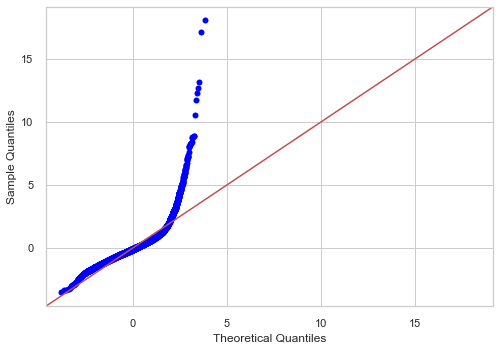

In [ ]:
# Checking that the residuals are normally distributed
# Modify line color to orange and thickness
fig = sm.graphics.qqplot(results_m2.resid, dist=stats.norm, line='45', fit=True);
# Getting the axes and modify the line color and thickness
ax = fig.get_axes()[0]
ax.get_lines()[0].set_color('orange')  # Set line color to orange
ax.get_lines()[0].set_linewidth(2)  # Set line thickness to 2

**Checking for Homescedasticity**


In [ ]:
# Check that the residuals are homoscedastic
plt.scatter(results_bm.predict(X_train_bm), results_m2.resid, color='red')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.plot(results_m2.predict(X_train_bm), [0 for i in range(len(X_train_bm))]);

NameError: name 'results_bm' is not defined

**Comments**

- Normality Assumption: the points in the QQ-normal plot lie on a straight diagonal line and the deviations from the straight      line are minimal. this is a confirmation that this is a normal distribution.
- Homoscedasticity Assumption: the data is a little heretoscedastic, but not too much. The points do not vary more widely          around the regression line for larger values of the explanatory variable.

**Model2(m2) Validation**

In [ ]:
bm_score = results_m2.rsquared_adj
bm_score

0.44716110450408064

In [ ]:
# Calculating predictions on training and test sets
y_hat_train = results_m2.predict(X_train_bm)
y_hat_test = results_m2.predict(X_test_bm)

In [ ]:
# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
# Calculate training and test MSE
train_mse_m2 = mean_squared_error(y_train, y_hat_train)
test_mse_m2 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error of Model_m2:', train_mse_m2)
print('Test Mean Squarred Error of Model_m2:', test_mse_m2)

ValueError: Found input variables with inconsistent numbers of samples: [14415, 13422]

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
# Calculate training and test RMSE
train_rmse_bm = rmse(y_hat_train, y_train)
test_rmse_bm = rmse(y_hat_test, y_test)
print('Train Root Mean Squarred Error of Model_m2:', train_rmse_bm)
print('Test Root Mean Squarred Error of Model_m2:', test_rmse_bm)

NameError: name 'rmse' is not defined

**For Model 1 - We remove Less Important features by stepwise selection with p-values**

In [ ]:
# improve the model's fit while considering the specified p-value thresholds for inclusion and exclusion.
# The process continues until no more changes can be made.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

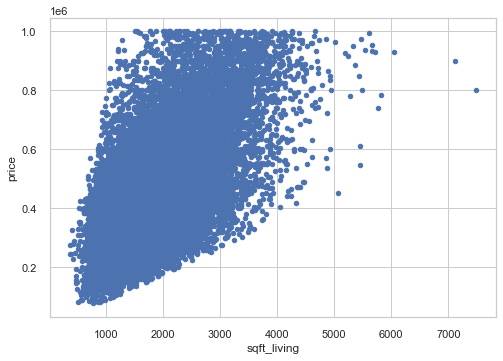

In [ ]:
df_filtered.plot.scatter(y = "price", x = "sqft_living")

**Adjusting Baseline Model**